# Datos de AQI de Madrid
### -Descargaremos los datos disponibles para cada estacion/grupo y selecionaremos los años 2018 , 2019 y 2020
### -Agruparemos los datos a medianas por dia
### -Sacaremos un csv resultado a mergear con las otras ramas (meteo y trafico) y integrar en el modelo de datos para visualizaciones (qlik sense)

Importamos las librerías y le cambiamos el encabezado para eliminar los espacios con los que viene el .csv en los títulos de las columnas.

In [1]:
casadecampo = "../datosmadrid_aqicn_org/casa-de campo, madrid, spain-air-quality.csv"
castellana = "../datosmadrid_aqicn_org/castellana,-madrid-air-quality.csv"
fernandezlareda = "../datosmadrid_aqicn_org/fernandez-ladreda, madrid-air-quality.csv"
cuatrocaminos = "../datosmadrid_aqicn_org/cuatro-caminos, madrid, spain-air-quality.csv"
escuelasaguirre = "../datosmadrid_aqicn_org/escuelas-aguirre, madrid-air-quality.csv"
madrid = "../datosmadrid_aqicn_org/madrid-air-quality.csv"
mendezalvaro = "../datosmadrid_aqicn_org/mendez-alvaro, madrid-air-quality.csv"
plazacastilla = "../datosmadrid_aqicn_org/plaza-de castilla, madrid-air-quality.csv"

In [2]:
import pandas as pd
import matplotlib.pyplot as pyplt
import seaborn as sns
from seaborn import pairplot


In [3]:
# defino una funcion para cargar cada csv en un dataframe
def tratamiento_datos_csv_aqi_madrid(url):
    dfContaminacion = pd.read_csv(url)
    columnNames = ['date', 'pm25', 'pm10','o3','no2','so2','co']
    dfContaminacion.columns = columnNames
    dfContaminacion ['date'] = pd.to_datetime(dfContaminacion['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    dfContaminacion ['pm25'] = pd.to_numeric(dfContaminacion['pm25'], errors='coerce')
    dfContaminacion ['pm10'] = pd.to_numeric(dfContaminacion['pm10'], errors='coerce')
    dfContaminacion ['o3'] = pd.to_numeric(dfContaminacion['o3'], errors='coerce')
    dfContaminacion ['no2'] = pd.to_numeric(dfContaminacion['no2'], errors='coerce')
    dfContaminacion ['so2'] = pd.to_numeric(dfContaminacion['so2'], errors='coerce')
    dfContaminacion ['co'] = pd.to_numeric(dfContaminacion['co'], errors='coerce')
    return dfContaminacion

In [4]:
# cargamos cada csv en un dataframe
casadecampo= tratamiento_datos_csv_aqi_madrid(casadecampo)
castellana =tratamiento_datos_csv_aqi_madrid(castellana)
fernandezlareda=tratamiento_datos_csv_aqi_madrid(fernandezlareda)
cuatrocaminos =tratamiento_datos_csv_aqi_madrid(cuatrocaminos)
escuelasaguirre =tratamiento_datos_csv_aqi_madrid(escuelasaguirre)
madrid =tratamiento_datos_csv_aqi_madrid(madrid)
mendezalvaro =tratamiento_datos_csv_aqi_madrid(mendezalvaro)
plazacastilla=tratamiento_datos_csv_aqi_madrid(plazacastilla)

#concatenamos todos los dataframes en 1 y ordenamos por fecha
dfContaminacion=pd.concat([casadecampo,castellana,fernandezlareda,cuatrocaminos,escuelasaguirre,madrid,mendezalvaro,plazacastilla])
dfContaminacion=dfContaminacion.sort_values(by='date', ascending=False)

Examinamos nuestros datos

In [5]:
print(dfContaminacion)

           date  pm25  pm10    o3   no2  so2  co
7    2021-02-08   8.0   NaN   NaN   NaN  NaN NaN
7    2021-02-08  12.0   NaN   NaN   NaN  NaN NaN
7    2021-02-08  19.0   NaN   NaN   NaN  NaN NaN
7    2021-02-08  15.0   NaN   NaN   NaN  NaN NaN
7    2021-02-08  10.0   NaN   NaN   NaN  NaN NaN
...         ...   ...   ...   ...   ...  ...  ..
2490 2013-12-31   NaN   8.0  14.0  16.0  3.0 NaN
2476 2013-12-31   NaN  13.0  20.0  18.0  2.0 NaN
2547 2013-12-31   NaN   6.0   NaN  13.0  1.0 NaN
2516 2013-12-31   NaN   9.0   NaN  17.0  NaN NaN
2544 2013-12-31   NaN   4.0  19.0   5.0  1.0 NaN

[20201 rows x 7 columns]


In [6]:
print(dfContaminacion.describe())
print(dfContaminacion.dtypes)

               pm25          pm10            o3           no2           so2  \
count  18341.000000  18513.000000  10051.000000  19997.000000  10350.000000   
mean      42.149283     18.225517     29.383743     18.979597      3.039324   
std       18.897080     10.602678     14.444792     10.525633      2.038261   
min        5.000000      1.000000      1.000000      1.000000      1.000000   
25%       28.000000     11.000000     20.000000     11.000000      1.000000   
50%       40.000000     16.000000     29.000000     18.000000      2.000000   
75%       54.000000     23.000000     38.000000     25.000000      4.000000   
max      159.000000    160.000000    249.000000     75.000000     42.000000   

        co  
count  0.0  
mean   NaN  
std    NaN  
min    NaN  
25%    NaN  
50%    NaN  
75%    NaN  
max    NaN  
date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: obj

##### Observamos el numero de valores por columna que nos vienen nulos.

In [7]:
dfContaminacion.isnull().sum()

date        0
pm25     1860
pm10     1688
o3      10150
no2       204
so2      9851
co      20201
dtype: int64

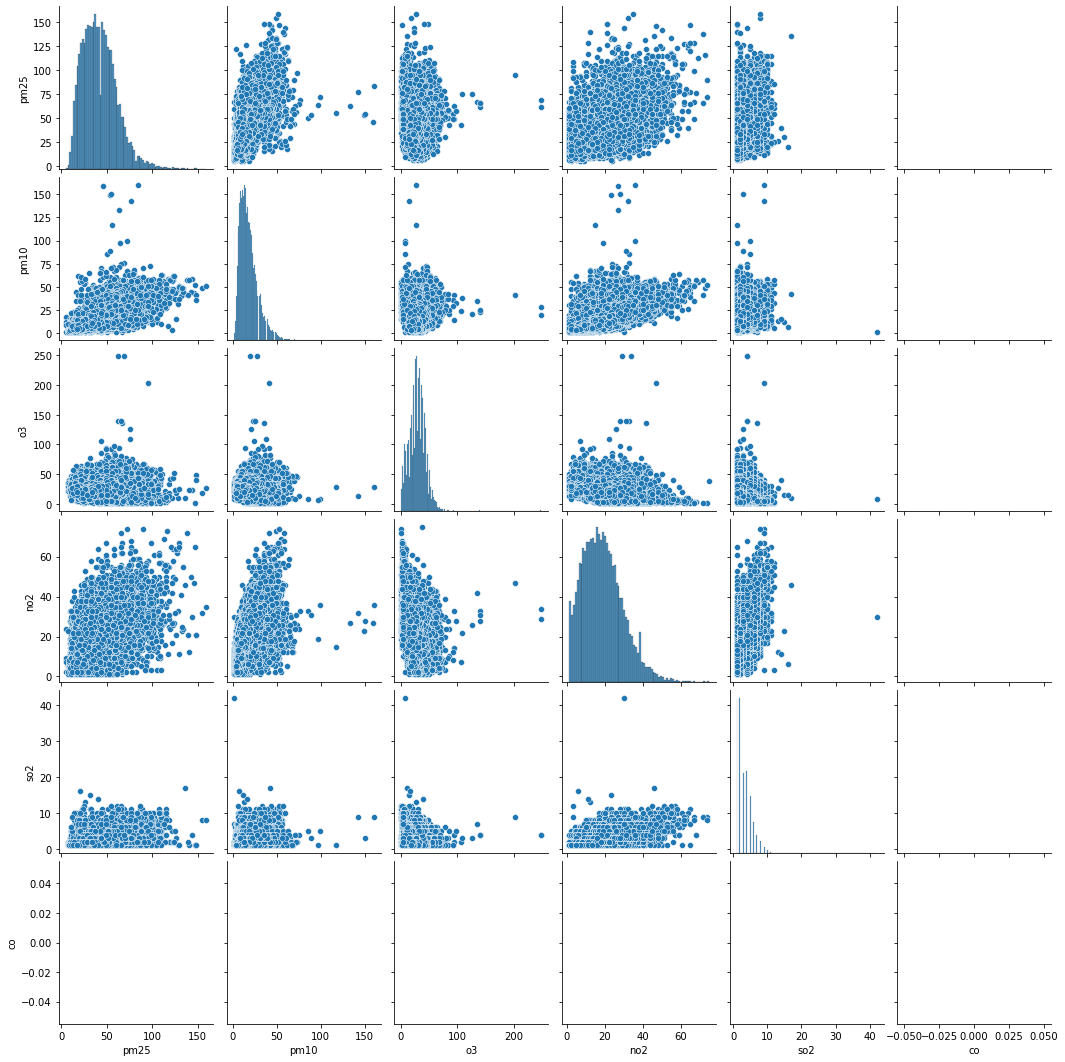

In [8]:
sns.pairplot(dfContaminacion)

In [9]:
# Convertimos la fecha a indice
#dfContaminacion.set_index('date')
# Sacaremos un solo valor medio por dia del año.
#Esto nos sirve para sacar el AQI medio de la ciudad de madrid, como para rellenar nulos en algunas de las estaciones
#dfContaminacion= dfContaminacion.resample('D').median()
#dfContaminacion.head

In [10]:
# agruparemos cada valor de las todas las estaciones medida a 1 valor mediana por fecha, asi calculamos valores por fecha para la ciudad de madrid
#co viene completamente nulo. no hace falta agruparlo
dfContaminacion_pm25= dfContaminacion.groupby('date')['pm25'].median()
dfContaminacion_pm10= dfContaminacion.groupby('date')['pm10'].median()
dfContaminacion_o3= dfContaminacion.groupby('date')['o3'].median()
dfContaminacion_no2= dfContaminacion.groupby('date')['no2'].median()
dfContaminacion_so2= dfContaminacion.groupby('date')['so2'].median()

dfContaminacion = pd.merge(dfContaminacion_pm25, dfContaminacion_pm10,left_index=True, right_index=True)
dfContaminacion = pd.merge(dfContaminacion, dfContaminacion_o3,left_index=True, right_index=True)
dfContaminacion = pd.merge(dfContaminacion, dfContaminacion_no2,left_index=True, right_index=True)
dfContaminacion = pd.merge(dfContaminacion, dfContaminacion_so2,left_index=True, right_index=True)

dfContaminacion.reset_index(level=0, inplace=True)
dfContaminacion.shape

(2563, 6)

In [11]:
# Filtro por fecha 18 a 20
dfContaminacion18a20 = dfContaminacion[(dfContaminacion['date'] >= '2018-01-01') & (dfContaminacion['date'] < '2021-01-01')]
print(dfContaminacion18a20.shape)
dfContaminacion18a20.head()

(1095, 6)


,date,pm25,pm10,o3,no2,so2
1429,2018-01-01,21.0,8.0,27.0,15.0,2.5
1430,2018-01-02,20.0,8.5,15.5,18.0,8.5
1431,2018-01-03,30.5,8.0,14.5,16.0,4.0
1432,2018-01-04,27.0,5.0,17.5,16.5,1.0
1433,2018-01-05,16.5,3.0,28.0,14.5,1.0


In [40]:
dfContaminacion18a20.isnull().sum()

date     0
pm25     2
pm10     1
o3       3
no2      1
so2     18
dtype: int64

### al combinar las estaciones y sacar medianas de la ciudad la cantidad de nulos se reduce

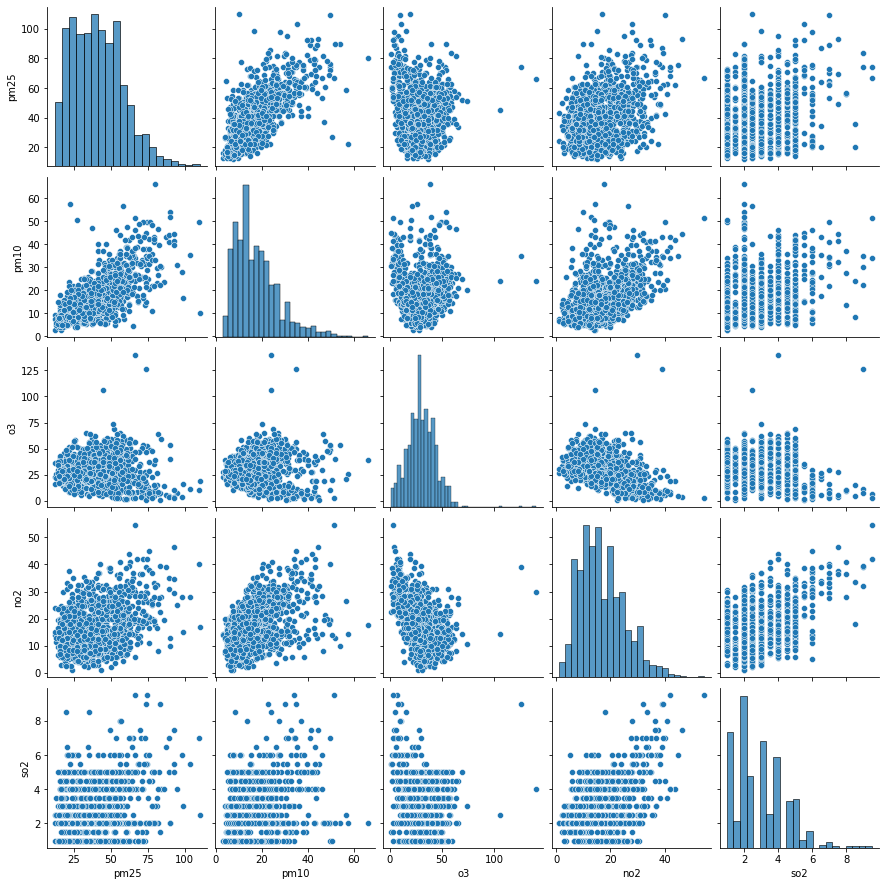

In [41]:
sns.pairplot(dfContaminacion18a20)

In [42]:
# Filtro por fecha 2018
dfContaminacion2018 = dfContaminacion[(dfContaminacion['date'] >= '2018-01-01') & (dfContaminacion['date'] < '2019-01-01')]
print(dfContaminacion2018.shape)
dfContaminacion2018.head()


(365, 6)


,date,pm25,pm10,o3,no2,so2
1429,2018-01-01,21.0,8.0,27.0,15.0,2.5
1430,2018-01-02,20.0,8.5,15.5,18.0,8.5
1431,2018-01-03,30.5,8.0,14.5,16.0,4.0
1432,2018-01-04,27.0,5.0,17.5,16.5,1.0
1433,2018-01-05,16.5,3.0,28.0,14.5,1.0


In [43]:
# Filtro por fecha 2019
dfContaminacion2019 = dfContaminacion[(dfContaminacion['date'] >='2019-01-01') & (dfContaminacion['date'] < '2020-01-01')]
print(dfContaminacion2019.shape)
dfContaminacion2019.head()


(364, 6)


,date,pm25,pm10,o3,no2,so2
1794,2019-01-01,74.0,35.0,126.0,39.0,9.0
1795,2019-01-02,74.0,23.0,13.0,30.0,6.0
1796,2019-01-03,49.5,32.5,6.0,37.5,7.5
1797,2019-01-04,65.0,34.5,3.0,37.0,7.0
1798,2019-01-05,74.5,34.0,7.0,42.0,9.5


In [44]:
# Filtro por fecha 2020
dfContaminacion2020 = dfContaminacion[(dfContaminacion['date'] >='2020-01-01') & (dfContaminacion['date'] < '2021-01-01')]
print(dfContaminacion2020.shape)
dfContaminacion2020.head()

(366, 6)


,date,pm25,pm10,o3,no2,so2
2158,2020-01-01,98.0,28.0,4.0,28.0,6.0
2159,2020-01-02,74.0,45.0,1.0,32.0,5.5
2160,2020-01-03,110.0,10.0,19.0,17.0,2.5
2161,2020-01-04,31.0,13.0,11.0,22.0,3.5
2162,2020-01-05,38.0,19.0,8.0,25.0,4.0


Volvemos a pintar los valores, pero esta vez del año 2018

In [45]:
#sns.pairplot(dfContaminacion2018)

In [46]:
#Miramos la correlación entre datos del 2018
dfContaminacion2018.corr()**2

,pm25,pm10,o3,no2,so2
pm25,1.000000,0.630298,0.010678,0.043815,0.082813
pm10,0.630298,1.000000,0.017081,0.128555,0.092702
o3,0.010678,0.017081,1.000000,0.196303,0.263854
no2,0.043815,0.128555,0.196303,1.000000,0.293083
so2,0.082813,0.092702,0.263854,0.293083,1.000000


In [47]:
#Miramos la correlación entre datos del 2019
dfContaminacion2019.corr()**2

,pm25,pm10,o3,no2,so2
pm25,1.000000,0.549729,0.005175,0.184101,0.107879
pm10,0.549729,1.000000,0.000606,0.287054,0.140125
o3,0.005175,0.000606,1.000000,0.152841,0.071966
no2,0.184101,0.287054,0.152841,1.000000,0.392957
so2,0.107879,0.140125,0.071966,0.392957,1.000000


In [48]:
#Se ha comentado al no aportar valor
#print(dfContaminacion2018.corr(method='pearson'))

Eliminamos los valores nulos sustituyéndolos por el valor correspondiente

In [49]:
from sklearn.impute import SimpleImputer
import numpy as numpy


imputerNanValuesToMean = SimpleImputer(missing_values=numpy.nan, strategy='mean')
imputerNanValuesToMedian = SimpleImputer(missing_values=numpy.nan, strategy='median')
imputerNanValuesToMode = SimpleImputer(strategy="most_frequent")

In [51]:
#Para el año 2018
imputerNanValuesToMean.fit_transform(dfContaminacion2018['pm25'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['pm10'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['o3'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['no2'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['so2'].values.reshape(-1,1))
#Para el año 2019
imputerNanValuesToMean.fit_transform(dfContaminacion2019['pm25'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2019['pm10'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2019['o3'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2019['no2'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2019['so2'].values.reshape(-1,1))

#Para el año 2020
imputerNanValuesToMean.fit_transform(dfContaminacion2020['pm25'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2020['pm10'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2020['o3'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2020['no2'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2020['so2'].values.reshape(-1,1))

array([[6.        ],
       [5.5       ],
       [2.5       ],
       [3.5       ],
       [4.        ],
       [5.5       ],
       [6.        ],
       [4.5       ],
       [2.        ],
       [3.        ],
       [3.5       ],
       [4.5       ],
       [3.        ],
       [3.        ],
       [3.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.5       ],
       [2.        ],
       [1.5       ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.24573864],
       [4.        ],
       [5.5       ],
       [3.        ],
       [2.5       ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [1.5       ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.        ],
       [2.5  

In [53]:
print("dfContaminacion2018",dfContaminacion2018.shape)
print("dfContaminacion2018",dfContaminacion2019.shape)
print("dfContaminacion2020",dfContaminacion2020.shape)

dfContaminacion2018 (365, 6)
dfContaminacion2018 (364, 6)
dfContaminacion2020 (366, 6)


Comprobamos la cantidad de valores nulos que tenemos


In [55]:
print("dfContaminacion2018",dfContaminacion2018.isnull().sum())
print("dfContaminacion2019",dfContaminacion2019.isnull().sum())
print("dfContaminacion2020",dfContaminacion2020.isnull().sum())

dfContaminacion2018 date    0
pm25    1
pm10    0
o3      0
no2     0
so2     3
dtype: int64
dfContaminacion2019 date    0
pm25    1
pm10    1
o3      1
no2     1
so2     1
dtype: int64
dfContaminacion2020 date     0
pm25     0
pm10     0
o3       2
no2      0
so2     14
dtype: int64


Miramos la distribución de nuestros datos


C:\Users\jaume\anaconda3\envs\BIGDATA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm10'>

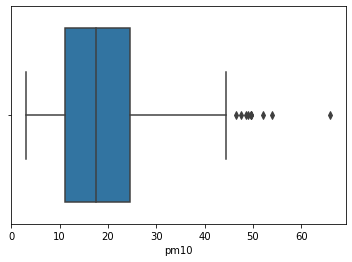

In [56]:
from seaborn import boxplot
boxplot(dfContaminacion2018.pm10)

C:\Users\jaume\anaconda3\envs\BIGDATA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm10'>

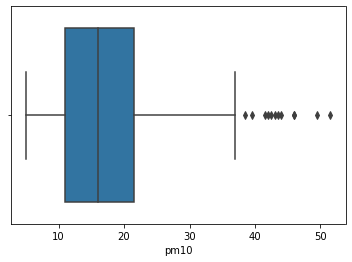

In [57]:
from seaborn import boxplot
boxplot(dfContaminacion2019.pm10)

C:\Users\jaume\anaconda3\envs\BIGDATA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm10'>

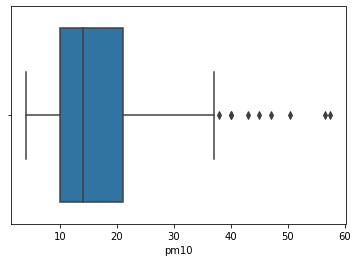

In [58]:
from seaborn import boxplot
boxplot(dfContaminacion2020.pm10)

In [59]:
q1=dfContaminacion2018['pm25'].quantile(0.25)
q2=dfContaminacion2018['pm25'].quantile(0.5)
IQ = q2-q1
#limiteSuperior = dfContaminacion2018['pm25'].quantile(0.75)
limiteSuperior = q1+1.5*IQ
limiteInferior = q2-1.5*IQ

print ("limite Superior",limiteSuperior, dfContaminacion2018.shape)
print ("limite inferior",limiteInferior, dfContaminacion2019.shape)



limite Superior 52.0 (365, 6)
limite inferior 24.0 (364, 6)


### No hacemos un drop de los valores que se salen de los cuartiles, puesto que más adelante se puede ver que realmente son significativos para nosotros

In [60]:
#dfContaminacion2018 = dfContaminacion2018.drop(dfContaminacion2018.loc[dfContaminacion2018['pm10'] > limiteSuperior].index)
#dfContaminacion2018 = dfContaminacion2018.drop(dfContaminacion2018.loc[dfContaminacion2018['pm10'] < limiteInferior].index)
#print(dfContaminacion2018.shape)

#dfContaminacion2019 = dfContaminacion2019.drop(dfContaminacion2019.loc[dfContaminacion2019['pm10'] > limiteSuperior].index)
#dfContaminacion2019 = dfContaminacion2019.drop(dfContaminacion2019.loc[dfContaminacion2019['pm10'] < limiteInferior].index)
#print(dfContaminacion2019.shape)


C:\Users\jaume\anaconda3\envs\BIGDATA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm10'>

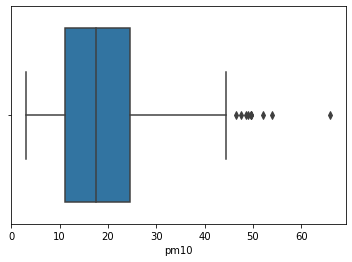

In [61]:
boxplot(dfContaminacion2018.pm10)

C:\Users\jaume\anaconda3\envs\BIGDATA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm10'>

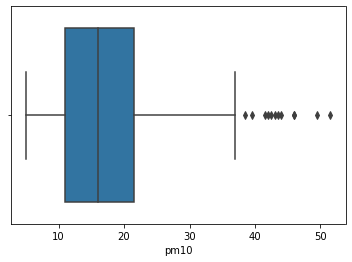

In [29]:
boxplot(dfContaminacion2019.pm10)

Concatenamos los datos del 2018,2019 y 2020

In [64]:
dfContaminacion18a20 = pd.concat([dfContaminacion2018, dfContaminacion2019, dfContaminacion2020])
dfContaminacion18a20.index = dfContaminacion18a20['date']
dfContaminacion18a20['year'] = dfContaminacion18a20.index.year

print(dfContaminacion18a20.head())


                 date  pm25  pm10    o3   no2  so2  year
date                                                    
2018-01-01 2018-01-01  21.0   8.0  27.0  15.0  2.5  2018
2018-01-02 2018-01-02  20.0   8.5  15.5  18.0  8.5  2018
2018-01-03 2018-01-03  30.5   8.0  14.5  16.0  4.0  2018
2018-01-04 2018-01-04  27.0   5.0  17.5  16.5  1.0  2018
2018-01-05 2018-01-05  16.5   3.0  28.0  14.5  1.0  2018


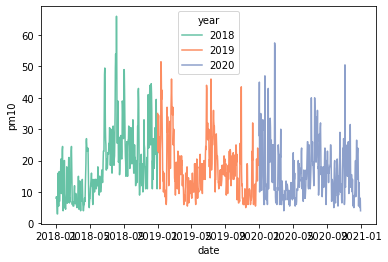

In [65]:
from seaborn import lineplot
from seaborn import relplot

from seaborn import distplot


sns.lineplot(x='date', y='pm10', hue= 'year', palette= 'Set2', data=dfContaminacion18a20.sort_values(by=['year']));

#sns.lineplot(x='month-day', y='pm10', hue= 'year', palette= 'Set2', data=dfContBarcPobl_PM10_NO2_2018_2019_rellenado.sort_values(by=['year','month-day']));
#sns.relplot(x=dfContaminacion2018.date, y=dfContaminacion2018.pm10,kind = 'line', data=dfContaminacion2018)


In [66]:
#import matplotlib.pyplot as plt
#ax = plt.subplot()
#ax.plot(kind = 'line', x = dfContaminacion2018.date, y = dfContaminacion2018['pm10'])
#ax.plot(kind = 'line', x = dfContaminacion2019.date, y = dfContaminacion2019['pm10'])

In [67]:
#dfContaminacion2018['pm10'].plot()
#dfContaminacion2019['pm10'].plot(ax=ax)

## Creamos un archivo de salida para los datos del 2018 al 2020

In [69]:
try:
    dfContaminacion18a20.to_csv('contaminacionMadrid2018_2019_2020.csv', columns =['date','pm10','pm25','o3','no2','so2'], sep=";", encoding = 'utf-8', index='date')
except:
    print("Error al crear el fichero csv")